In [1]:
%run ../scripts/imports.py

data_path = open("../path_data.txt", 'r').readline()

Succesfully imported libraries and modules



## Introduction

In this workspace we will generate:
1) Comparison of PAC OFF and ON + visualization
2) Comparison of cross-PAC and inter-PAC + visualization
3) Comparison of stongest PAC OFF vs ON

Statistical tests should be made to test for difference for each comparison.
1. Test for normality (stats.normaltest)
2. Test for difference (t-test or wilcoxon test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)


In [47]:
filename = "../data/beta_hfo_pac_powers_REST.csv"

df = pd.read_csv(filename, sep=',', index_col=0)
df.head()

,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ldopa
0,Patient1,1Day OFF Rest 180sec,R1-2C,R1-2C,0.64257,0.000345,0.000129,0.000294,0,OFF
1,Patient1,1Day OFF Rest 180sec,R1-2C,R4-3A,0.64257,0.000357,0.000215,0.000635,1,OFF
2,Patient1,1Day OFF Rest 180sec,R1-2C,R1-2A,0.64257,0.000370,0.000000,0.000000,1,OFF
3,Patient1,1Day OFF Rest 180sec,R1-2C,R2C-3C,0.64257,0.000276,0.000000,0.000000,1,OFF
4,Patient1,1Day OFF Rest 180sec,R1-2C,R2B-3B,0.64257,0.000222,0.000000,0.000000,1,OFF


In [48]:
d = {0: "Intra-PAC", 1: "Cross-PAC"}

df['Type of PAC'] = df['is_cross_pac'].apply(lambda s: d[s])

## Saving violinplots

In [5]:
save_path = os.path.join(data_path, 'im_common', 'PAC statistical comparison', 'Violinplots')

try:
    os.makedirs(save_path)
except:
    pass

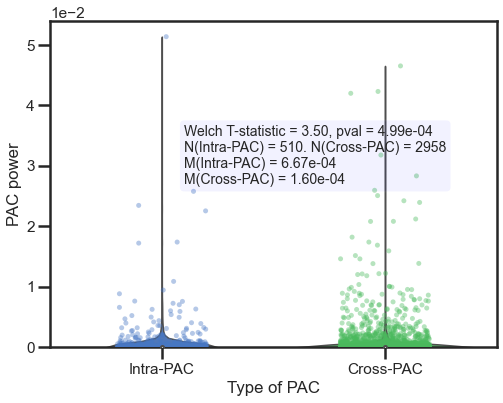

In [57]:
plt.figure(figsize=(8, 6))
sns.set_context('poster', font_scale=0.7)
my_palette = {"Intra-PAC": "#4777c4", "Cross-PAC": "#4aba5d"}
sns.stripplot(x='Type of PAC', y='pac_power_p2', data=df, jitter=0.2, palette=my_palette, alpha=0.4)
ax = sns.violinplot(x='Type of PAC', y='pac_power_p2', data=df, palette=my_palette, linewidth=1.5, cut=0)
#ax.set_xlabel("L-DOPA")

stat, pvalue = stats.ttest_ind(x, y, equal_var=False)
stat_result = f"Welch T-statistic = {stat:.2f}, pval = {pvalue:.2e} \nN(Intra-PAC) = {len(x)}. N(Cross-PAC) = {len(y)}\nM(Intra-PAC) = {x.mean():.2e} \nM(Cross-PAC) = {y.mean():.2e}"
ax.text(0.3, 0.5, s=stat_result, fontsize=14, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.05, ), transform=ax.transAxes)

ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.set_ylabel("PAC power")
ax.set_ylim(bottom=0)
#ax.set_title("PAC power in OFF (left) and ON (right) state; \n Both cross- and inter- PAC")
plt.savefig(os.path.join(save_path, 'Violin_Cross vs Intra.png'), dpi=200)

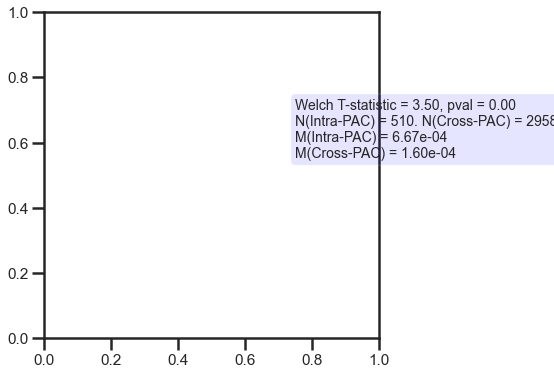

In [58]:
plt.figure(figsize=(6, 6))

stat, pvalue = stats.ttest_ind(x, y, equal_var=False)
stat_result = f"Welch T-statistic = {stat:.2f}, pval = {pvalue:.2f} \nN(Intra-PAC) = {len(x)}. N(Cross-PAC) = {len(y)}\nM(Intra-PAC) = {x.mean():.2e} \nM(Cross-PAC) = {y.mean():.2e}"
plt.text(0.5, 0.5, s=stat_result, fontsize=14, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.1, ), transform=ax.transAxes)
plt.savefig(os.path.join(save_path, 'Violin_Cross vs Intra STAT RESULT.png'), dpi=200)

In [26]:
x = np.array(df['pac_power_p2'][df.is_cross_pac == 0])
y = np.array(df['pac_power_p2'][df.is_cross_pac == 1])
stat = stats.ttest_ind(x, y, equal_var=False)
stat_result = f"Welch T-statistic = {stat:.1e}, pval = {pvalue:.1e}, N(Intra-PAC) = {len(x)}. M(Cross-PAC) = {len(y)}\n M(Intra-PAC) = {x.mean():.2e} \n M(Cross-PAC) = {y.mean():.2e}"
plt.text(0.9, 0.9, s=stat_result, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.2, ), transform=ax.transAxes)


Ttest_indResult(statistic=0.9590952772543146, pvalue=0.33776898747548434)

In [24]:
x_nonzero = x[x > 0]
y_nonzero = y[y > 0]

In [27]:
stats.ttest_ind(x_nonzero, y_nonzero, equal_var=False)

Ttest_indResult(statistic=1.1183559406020593, pvalue=0.2642841213593599)

In [19]:
len(x)

660

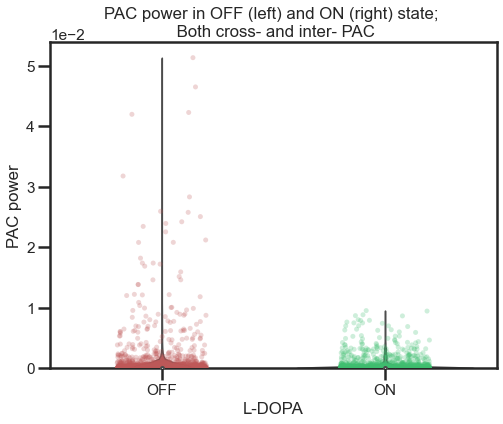

In [9]:
plt.figure(figsize=(8, 6))
sns.set_context('poster', font_scale=0.7)
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}
sns.stripplot(x='ldopa', y='pac_power_p2', data=df, jitter=0.2, palette=my_palette, alpha=0.25, order=['OFF', 'ON'])
ax = sns.violinplot(x='ldopa', y='pac_power_p2', data=df, palette=my_palette, order=['OFF', 'ON'], linewidth=1.5, cut=0)
ax.set_xlabel("L-DOPA")
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.set_ylabel("PAC power")
ax.set_ylim(bottom=0)
ax.set_title("PAC power in OFF (left) and ON (right) state; \n Both cross- and inter- PAC")
plt.savefig(os.path.join(save_path, 'Violin_OFF vs ON.png'), dpi=150)

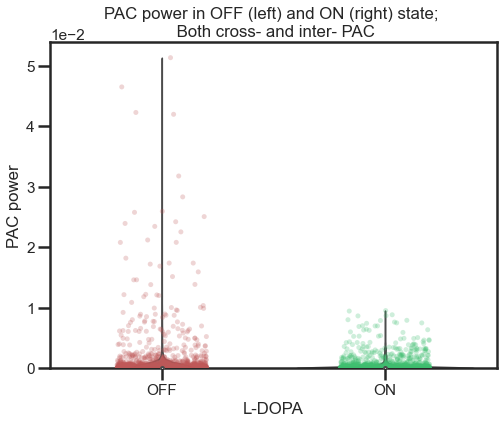

In [10]:
plt.figure(figsize=(8, 6))
sns.set_context('poster', font_scale=0.7)
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}
sns.stripplot(x='ldopa', y='pac_power_p2', data=df, jitter=0.2, palette=my_palette, alpha=0.25, order=['OFF', 'ON'])
ax = sns.violinplot(x='ldopa', y='pac_power_p2', data=df, palette=my_palette, order=['OFF', 'ON'], linewidth=1.5, cut=0)
ax.set_xlabel("L-DOPA")
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.set_ylabel("PAC power")
ax.set_ylim(bottom=0)
ax.set_title("PAC power in OFF (left) and ON (right) state; \n Both cross- and inter- PAC")
plt.savefig(os.path.join(save_path, 'Violin_OFF vs ON.png'), dpi=150)

In [11]:
df['Cross_PAC'] = df['is_cross_pac'].apply(lambda x: "Cross-PAC" if x == 1 else "Inter-PAC")

In [12]:
df

,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ldopa,Type of PAC,Cross_PAC
0,Patient1,1Day OFF Rest 180sec,R1-2C,R1-2C,0.642570,0.000345,0.000129,0.000294,0,OFF,Intra-PAC,Inter-PAC
1,Patient1,1Day OFF Rest 180sec,R1-2C,R4-3A,0.642570,0.000357,0.000215,0.000635,1,OFF,Cross-PAC,Cross-PAC
2,Patient1,1Day OFF Rest 180sec,R1-2C,R1-2A,0.642570,0.000370,0.000000,0.000000,1,OFF,Cross-PAC,Cross-PAC
3,Patient1,1Day OFF Rest 180sec,R1-2C,R2C-3C,0.642570,0.000276,0.000000,0.000000,1,OFF,Cross-PAC,Cross-PAC
4,Patient1,1Day OFF Rest 180sec,R1-2C,R2B-3B,0.642570,0.000222,0.000000,0.000000,1,OFF,Cross-PAC,Cross-PAC
...,...,...,...,...,...,...,...,...,...,...,...,...
5911,Patient9,5Day ON Rest 180sec,L1-2C,L2B-3B,0.557723,0.000996,0.000000,0.000000,1,ON,Cross-PAC,Cross-PAC
5912,Patient9,5Day ON Rest 180sec,L1-2C,L1-2A,0.557723,0.001477,0.000146,0.000336,1,ON,Cross-PAC,Cross-PAC
5913,Patient9,5Day ON Rest 180sec,L1-2C,L1-2B,0.557723,0.001660,0.000000,0.000000,1,ON,Cross-PAC,Cross-PAC
5914,Patient9,5Day ON Rest 180sec,L1-2C,L4-3B,0.557723,0.000610,0.000000,0.000000,1,ON,Cross-PAC,Cross-PAC


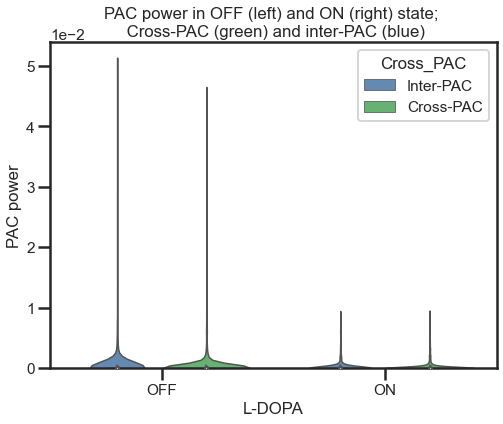

In [13]:
plt.figure(figsize=(8, 6))
sns.set_context('poster', font_scale=0.7)
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}
my_hue_palette = {"Inter-PAC": '#588abf', "Cross-PAC": "#58bf69"}

palette = my_hue_palette

#sns.stripplot(x='ldopa', y='pac_power_p2', data=df, hue='is_cross_pac', palette=palette, alpha=0.25, order=['OFF', 'ON'])
ax = sns.violinplot(x='ldopa', y='pac_power_p2', hue='Cross_PAC', data=df, 
                    palette=palette, 
                    order=['OFF', 'ON'], linewidth=1.5, cut=0)

#plt.legend(labels=["Inter-PAC","Cross-PAC"])
ax.set_xlabel("L-DOPA")
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.set_ylim(bottom=0)
ax.set_ylabel("PAC power")
ax.set_title("PAC power in OFF (left) and ON (right) state; \n Cross-PAC (green) and inter-PAC (blue)")
plt.savefig(os.path.join(save_path, 'Violin_Cross vs Inter OFF vs ON.png'), dpi=150)

## KDE PAC power OFF vs ON

### All PAC

In [14]:
with open('../path_data.txt', 'r') as f:
    data_path = f.readline()

save_path = os.path.join(data_path, 'im_common', 'PAC statistical comparison', 'KDEs and wilcoxon tests')

try:
    os.makedirs(save_path)
except:
    pass

In [16]:
df_offvson = pd.read_csv("../data/df_OFFvsON_new.csv", sep=',', index_col=0)

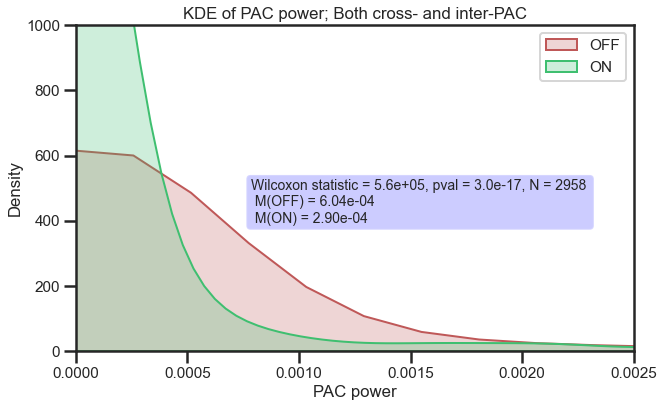

In [23]:
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}

x = df_offvson.pac_power_OFF
y = df_offvson.pac_power_ON

stat, pvalue = stats.wilcoxon(x, y, alternative='two-sided')

for ldopa in ["OFF", "ON"]:
    y = df[df['ldopa'] == ldopa].pac_power_p2
    sns.kdeplot(y, cut=0, shade=True, color=my_palette[ldopa], label=ldopa)
    
median_off = x.mean()
median_on = y.mean()

stat_result = f"Wilcoxon statistic = {stat:.1e}, pval = {pvalue:.1e}, N = {len(x)} \n M(OFF) = {median_off:.2e} \n M(ON) = {median_on:.2e}"
plt.text(0.4, 0.4, s=stat_result, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.2), fontsize=14, transform=ax.transAxes)
plt.legend()
plt.xlabel("PAC power")
title = "KDE of PAC power; Both cross- and inter-PAC"
plt.title(title)
plt.xlim((0, 2.5e-3))
plt.ylim((0, 1000))

plt.savefig(os.path.join(save_path, title + ".png"), dpi=150, bbox_inches='tight')

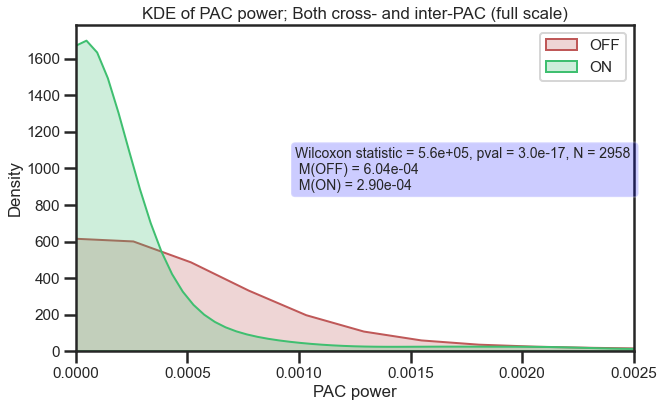

In [26]:
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}

x = df_offvson.pac_power_OFF
y = df_offvson.pac_power_ON

stat, pvalue = stats.wilcoxon(x, y, alternative='two-sided')

for ldopa in ["OFF", "ON"]:
    y = df[df['ldopa'] == ldopa].pac_power_p2
    sns.kdeplot(y, cut=0, shade=True, color=my_palette[ldopa], label=ldopa)

median_off = x.mean()
median_on = y.mean()

stat_result = f"Wilcoxon statistic = {stat:.1e}, pval = {pvalue:.1e}, N = {len(x)} \n M(OFF) = {median_off:.2e} \n M(ON) = {median_on:.2e}"
plt.text(0.5, 0.5, s=stat_result, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.2, ), fontsize=14, transform=ax.transAxes)
plt.legend()
plt.xlabel("PAC power")
title = "KDE of PAC power; Both cross- and inter-PAC (full scale)"
plt.title(title)
plt.xlim((0, 2.5e-3))

plt.savefig(os.path.join(save_path, title + ".png"), dpi=150, bbox_inches='tight')

### Cross-PAC

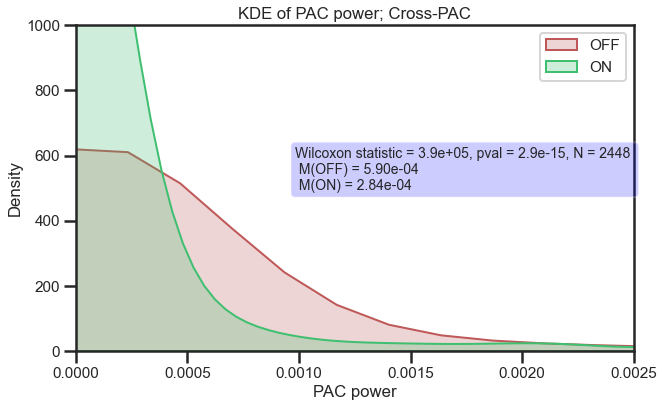

In [28]:
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}

mask = df_offvson.is_cross_pac == 1
x = df_offvson.pac_power_OFF[mask]
y = df_offvson.pac_power_ON[mask]

stat, pvalue = stats.wilcoxon(x, y, alternative='two-sided')

for ldopa in ["OFF", "ON"]:
    y = df_offvson[f'pac_power_{ldopa}'][mask]
    sns.kdeplot(y, cut=0, shade=True, color=my_palette[ldopa], label=ldopa)

median_off = x.mean()
median_on = y.mean()

stat_result = f"Wilcoxon statistic = {stat:.1e}, pval = {pvalue:.1e}, N = {len(x)} \n M(OFF) = {median_off:.2e} \n M(ON) = {median_on:.2e}"
plt.text(0.5, 0.5, s=stat_result, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.2, ), fontsize=14, transform=ax.transAxes)
plt.legend()
plt.xlabel("PAC power")
title = "KDE of PAC power; Cross-PAC"
plt.title(title)
plt.xlim((0, 2.5e-3))
plt.ylim((0, 1000))

plt.savefig(os.path.join(save_path, title + ".png"), dpi=150, bbox_inches='tight')

### Inter-PAC

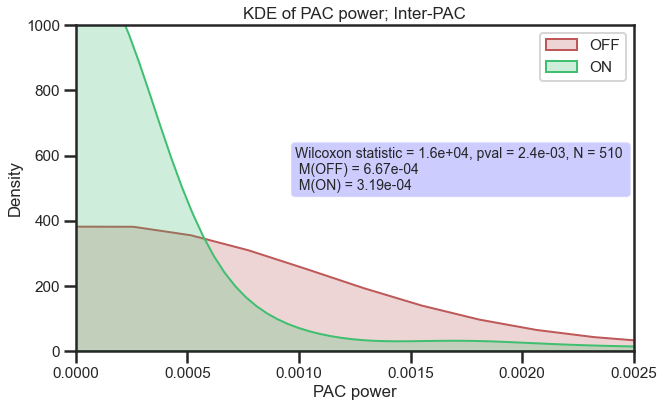

In [29]:
my_palette = {"OFF": "#bf5858", "ON": "#3fbf70"}

mask = df_offvson.is_cross_pac == 0
x = df_offvson.pac_power_OFF[mask]
y = df_offvson.pac_power_ON[mask]

stat, pvalue = stats.wilcoxon(x, y, alternative='two-sided')

for ldopa in ["OFF", "ON"]:
    y = df_offvson[f'pac_power_{ldopa}'][mask]
    sns.kdeplot(y, cut=0, shade=True, color=my_palette[ldopa], label=ldopa)

median_off = x.mean()
median_on = y.mean()

stat_result = f"Wilcoxon statistic = {stat:.1e}, pval = {pvalue:.1e}, N = {len(x)} \n M(OFF) = {median_off:.2e} \n M(ON) = {median_on:.2e}"
plt.text(0.5, 0.5, s=stat_result, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.2, ), fontsize=14, transform=ax.transAxes)
plt.legend()
plt.xlabel("PAC power")
title = "KDE of PAC power; Inter-PAC"
plt.title(title)
plt.xlim((0, 2.5e-3))
plt.ylim((0, 1000))

plt.savefig(os.path.join(save_path, title + ".png"), dpi=150, bbox_inches='tight')
plt.show()

## Wilcoxon Tests

Нужно составить табличку именно paired samples (1 condition OFF vs 1 condition ON)

Хоче сделать так:
1Day Rest pac_power_ON = ..., pac_power_OFF = ...

In [42]:
df = pd.read_csv("../data/df_OFFvsON_Rest.csv", sep=',', index_col=0)
df.head()

,patient,phase,amplitude,is_cross_pac,day,beta_power_OFF,beta_power_ON,hfo_power_OFF,hfo_power_ON,pac_power_p2_OFF,pac_power_p2_ON,pac_power_p09_OFF,pac_power_p09_ON
0,Patient1,R1-2C,R1-2C,0,1Day,0.702362,0.385089,0.001087,0.001147,0.000000,0.000193,0.000000,0.000376
1,Patient1,R1-2C,R1-2C,0,5Day,0.574209,0.551994,0.000818,0.000613,0.000000,0.000000,0.000000,0.000000
2,Patient1,R1-2C,R1-2B,1,1Day,0.702362,0.385089,0.000713,0.001868,0.000000,0.000000,0.000000,0.000000
3,Patient1,R1-2C,R1-2B,1,5Day,0.574209,0.551994,0.000652,0.000564,0.000000,0.000000,0.000000,0.000000
4,Patient1,R1-2C,R1-2A,1,1Day,0.702362,0.385089,0.000629,0.007668,0.002057,0.000310,0.024133,0.001059


In [43]:
df['pac_power_p2_diff'] = df['pac_power_p2_OFF'] - df['pac_power_p2_ON']
df['pac_power_p09_diff'] = df['pac_power_p09_OFF'] - df['pac_power_p09_ON']

### OFF - ON difference KDE

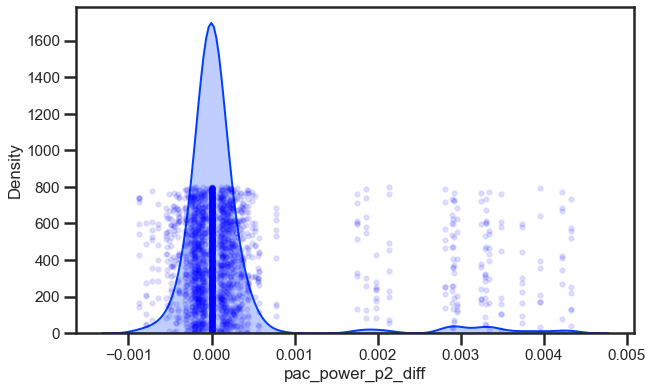

In [39]:
y = df['pac_power_p2_diff']

sns.kdeplot(data=df, x=y, vertical=False, shade=True)
plt.scatter(x=y, y=np.zeros(len(y)) + 800 * np.random.uniform(size=len(y)),  alpha=0.1, s=20, c='blue')

## Cross- vs Inter-PAC: nonparametric test

In [44]:
x_cross = df[df.is_cross_pac == 1]['pac_power_p2']
x_inter = df[df.is_cross_pac == 0]['pac_power_p2']

res, pval = stats.mannwhitneyu(x_cross, x_inter, alternative='greater')
print(f"Mann-Whitney-U test result: statistic = {res:.2e}, pvalue = {pval:.2f}")

KeyError: 'pac_power_p2'

### OFF vs ON - all PACs

In [41]:
x = df_offvson.pac_power_p2_OFF
y = df_offvson.pac_power_p2_ON

stats.wilcoxon(x, y, alternative='two-sided')

AttributeError: 'DataFrame' object has no attribute 'pac_power_p2_OFF'

### OFF vs ON - cross PAC and inter-PAC

#### Inter-PAC

In [33]:
x = df.pac_power_p2_OFF[df.is_cross_pac == 0]
y = df.pac_power_p2_ON[df.is_cross_pac == 0]

stats.wilcoxon(x, y, alternative='two-sided')

AttributeError: 'DataFrame' object has no attribute 'pac_power_p2_OFF'

#### Cross-PAC

In [30]:
x = df.pac_power_p2_OFF[df.is_cross_pac == 1]
y = df.pac_power_p2_ON[df.is_cross_pac == 1]

stats.wilcoxon(x, y, alternative='two-sided')

AttributeError: 'DataFrame' object has no attribute 'pac_power_p2_OFF'

## Cross-PAC vs Inter-PAC: proportions of PAC present in bigraph

In [14]:
filename = "../data/beta_hfo_pac_powers_REST.csv"

data = pd.read_csv(filename, sep=',', index_col=0)
data.head()

,patient,condition,phase,amplitude,beta_power,hfo_power,pac_power_p2,pac_power_p09,is_cross_pac,ldopa
0,Patient1,1Day ON Rest 180sec,R1-2A,R1-2A,0.471097,0.001178,0.0,0.0,0,ON
1,Patient1,1Day ON Rest 180sec,R1-2A,R4-3B,0.471097,0.001514,0.0,0.0,1,ON
2,Patient1,1Day ON Rest 180sec,R1-2A,R1-2B,0.471097,0.000648,0.0,0.0,1,ON
3,Patient1,1Day ON Rest 180sec,R1-2A,R4-3C,0.471097,0.001486,0.0,0.0,1,ON
4,Patient1,1Day ON Rest 180sec,R1-2A,R2B-3B,0.471097,0.000949,0.0,0.0,1,ON


In [9]:
conditions = ["1Day OFF Rest 180sec", "1Day ON Rest 180sec", "5Day OFF Rest 180sec", "5Day ON Rest 180sec"]
cross_placements = ["L4-3A", "L4-3B", "L4-3C", "L2A-3A", "L2B-3B", "L2C-3C", "L1-2A", "L1-2B", "L1-2C", "R4-3A", "R4-3B", "R4-3C", "R2A-3A", "R2B-3B", "R2C-3C", "R1-2A", "R1-2B", "R1-2C"]

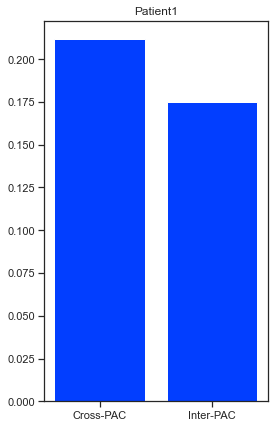

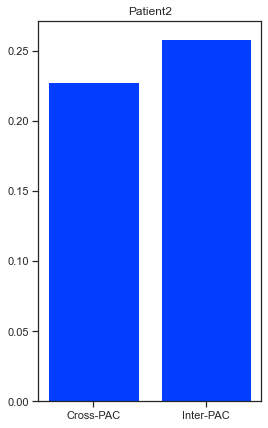

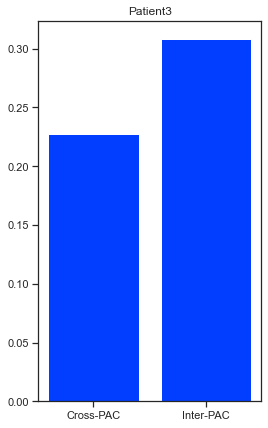

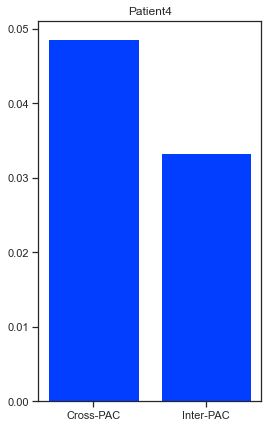

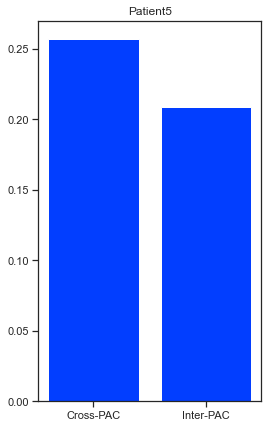

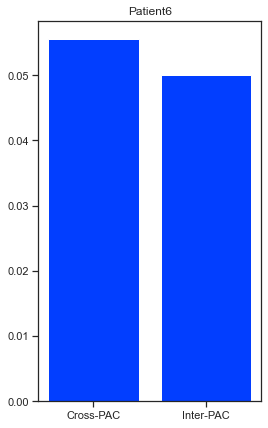

In [15]:
THRESHOLD = 5e-4

for patient_name in ["Patient" + str(i) for i in range(1, 7)]:
    
    df = data[data.patient == patient_name] 
    n_cross = df[df.is_cross_pac == 1].count()[0]
    n_intra = df[df.is_cross_pac == 0].count()[0]
    
    df_sig = df[df.pac_power_p09 >= THRESHOLD]
    n_cross_sig = df_sig[df_sig.is_cross_pac == 1].count()[0]
    n_intra_sig = df_sig[df_sig.is_cross_pac == 0].count()[0]
    
    plt.figure(figsize=(4, 7))
    plt.title(f"{patient_name}")
    plt.bar(["Cross-PAC", "Inter-PAC"], [n_cross_sig/n_cross, n_intra_sig/n_intra])

<BarContainer object of 2 artists>

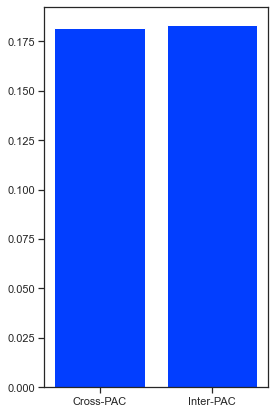

In [16]:
df = data

n_cross = df[df.is_cross_pac == 1].count()[0]
n_intra = df[df.is_cross_pac == 0].count()[0]

df_sig = df[df.pac_power_p09 >= THRESHOLD]
n_cross_sig = df_sig[df_sig.is_cross_pac == 1].count()[0]
n_intra_sig = df_sig[df_sig.is_cross_pac == 0].count()[0]

plt.figure(figsize=(4, 7))
#plt.title(f"{patient_name}")
plt.bar(["Cross-PAC", "Inter-PAC"], [n_cross_sig/n_cross, n_intra_sig/n_intra])